<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
claims = pd.read_csv('/content/CLM DATA.csv',index_col=0)
claims.set_index('CLAIM NO')
pd.set_option('display.max_columns', None)

In [150]:
# Checking for column data types
claims.dtypes

CLAIM NO                  int64
COMPANY                   int64
LINE                     object
PRODUCT TYPE             object
CLAIM TYPE               object
SUBCLAIM TYPE            object
CLAIM STATUS             object
AVAILED                  object
DISCHARGED               object
LOS                       int64
PROVIDER NAME            object
PROVIDER REGION          object
MAIN PROCEDURE           object
MAIN ICD CODE            object
MAIN DIAGNOSIS           object
BILL TYPE                object
BILL RECEIVED DATE       object
MEMBER                    int64
AGE AVAILED               int64
GENDER                   object
MEMBER CATEGORY          object
BENEFIT CLASS            object
DATE PROCESSED           object
COVERED AMOUNT          float64
GROSS AMOUNT            float64
HOSPITAL BILL           float64
PROFESSIONAL FEE          int64
REIMBURSEMENT AMOUNT    float64
CN#                       int64
dtype: object

In [151]:
# Checking for null values
claims.isnull().sum()

CLAIM NO                   0
COMPANY                    0
LINE                       0
PRODUCT TYPE               0
CLAIM TYPE                 0
SUBCLAIM TYPE              0
CLAIM STATUS               0
AVAILED                    0
DISCHARGED              3085
LOS                        0
PROVIDER NAME              0
PROVIDER REGION         1902
MAIN PROCEDURE          9210
MAIN ICD CODE            271
MAIN DIAGNOSIS           271
BILL TYPE                  2
BILL RECEIVED DATE       920
MEMBER                     0
AGE AVAILED                0
GENDER                     0
MEMBER CATEGORY            2
BENEFIT CLASS            829
DATE PROCESSED             0
COVERED AMOUNT             0
GROSS AMOUNT               0
HOSPITAL BILL              0
PROFESSIONAL FEE           0
REIMBURSEMENT AMOUNT       0
CN#                        0
dtype: int64

As clarified by the business owner, blank ICD code and ICD code=2 both indicate that there is no diagnosis.

In [152]:
# Filling blank ICD with 2 and blank Main Diagnosis with No Diagnosis
claims['MAIN ICD CODE'].fillna('2',inplace=True)
claims['MAIN DIAGNOSIS'].fillna('NO DIAGNOSIS (FOR CLINIC USE ONLY)',inplace=True)
claims.isnull().sum()

CLAIM NO                   0
COMPANY                    0
LINE                       0
PRODUCT TYPE               0
CLAIM TYPE                 0
SUBCLAIM TYPE              0
CLAIM STATUS               0
AVAILED                    0
DISCHARGED              3085
LOS                        0
PROVIDER NAME              0
PROVIDER REGION         1902
MAIN PROCEDURE          9210
MAIN ICD CODE              0
MAIN DIAGNOSIS             0
BILL TYPE                  2
BILL RECEIVED DATE       920
MEMBER                     0
AGE AVAILED                0
GENDER                     0
MEMBER CATEGORY            2
BENEFIT CLASS            829
DATE PROCESSED             0
COVERED AMOUNT             0
GROSS AMOUNT               0
HOSPITAL BILL              0
PROFESSIONAL FEE           0
REIMBURSEMENT AMOUNT       0
CN#                        0
dtype: int64

The business owner has advised that Bill Received Date and Date Processed are irrelevant to our study

In [153]:
# Dropping the columns
not_relevant = ['BILL RECEIVED DATE','DATE PROCESSED']
claims = claims.drop(not_relevant, axis=1)
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167064 entries, 0 to 47063
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CLAIM NO              167064 non-null  int64  
 1   COMPANY               167064 non-null  int64  
 2   LINE                  167064 non-null  object 
 3   PRODUCT TYPE          167064 non-null  object 
 4   CLAIM TYPE            167064 non-null  object 
 5   SUBCLAIM TYPE         167064 non-null  object 
 6   CLAIM STATUS          167064 non-null  object 
 7   AVAILED               167064 non-null  object 
 8   DISCHARGED            163979 non-null  object 
 9   LOS                   167064 non-null  int64  
 10  PROVIDER NAME         167064 non-null  object 
 11  PROVIDER REGION       165162 non-null  object 
 12  MAIN PROCEDURE        157854 non-null  object 
 13  MAIN ICD CODE         167064 non-null  object 
 14  MAIN DIAGNOSIS        167064 non-null  object 
 15  B

Exploring the amount covered by IHC in the claims

In [154]:
# Checking aggregate values of covered amount
claims['COVERED AMOUNT'].describe()

count    167064.000000
mean       3847.945107
std       13332.050446
min           0.000000
25%         500.000000
50%         920.000000
75%        3261.457500
max      629999.990000
Name: COVERED AMOUNT, dtype: float64

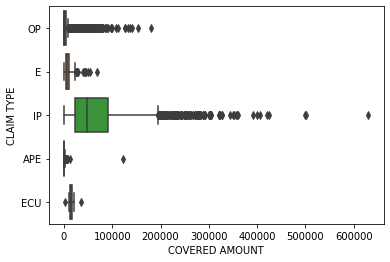

In [155]:
# Plotting by Claim Type
sns.boxplot(x='COVERED AMOUNT', y='CLAIM TYPE', data = claims)

In [156]:
# Checking details of the claim with highest covered amount
claims.loc[claims['COVERED AMOUNT'] ==  629999.99].T

,18027
CLAIM NO,241736
COMPANY,0
LINE,HMO RETAIL
PRODUCT TYPE,RETAIL S
CLAIM TYPE,IP
SUBCLAIM TYPE,SURGICAL
CLAIM STATUS,REQUEST FOR PAYMENT
AVAILED,2021-01-19
DISCHARGED,2021-03-11
LOS,51


Exploring top 10 Companies with most claims

In [157]:
company_top_ten = claims['COMPANY'].value_counts().head(10)
company_top_ten

391     33351
494     24127
80      17675
18       9897
0        6163
30       5949
1555     4811
209      4102
495      3879
514      3338
Name: COMPANY, dtype: int64

Checking the covered amount for Company 391

In [158]:
claims.loc[claims['COMPANY']==391].sort_values('COVERED AMOUNT', ascending=False).head(10)

,CLAIM NO,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,SUBCLAIM TYPE,CLAIM STATUS,AVAILED,DISCHARGED,LOS,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MAIN ICD CODE,MAIN DIAGNOSIS,BILL TYPE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
3345,303592,391,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-03-13,2021-03-30,17,WEST METRO MEDICAL CENTER,ZAMBOANGA PENINSULA,ANTIBIOTICS,L03.1,CELLULITIS AND ACUTE LYMPHANGITIS OF OTHER PAR...,H,104029,48,F,P,SEMI-PRIVATE,281286.00,163910.00,138710.00,25200,0.0,63346
43418,353154,391,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-08-31,2021-09-22,22,NUEVA ECIJA GOOD SAMARITAN HEALTH SYSTEM INC.-...,CENTRAL LUZON,OXYGEN,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,122171,75,M,S,SEMI-PRIVATE DEP 3 MOA,175134.51,175134.51,147534.51,27600,0.0,103419
13734,390533,391,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-07-07,2021-07-15,8,DR. AMANDO COPE MEMORIAL HOSPITAL,BICOL REGION,OXYGEN,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,102200,63,F,P,SEMI-PRIVATE,161989.14,161989.14,156139.14,5850,0.0,133735
26261,412272,391,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-11-12,2021-11-14,2,VICTOR R. POTENCIANO MEDICAL CENTER,NATIONAL CAPITAL REGION,ANESTHESIOLOGY,H25.8,OTHER AGE-RELATED CATARACT ...,H,100306,62,F,P,SEMI-PRIVATE,150750.00,150750.00,81450.00,69300,0.0,146262
48952,359802,391,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-10-12,2021-10-26,14,MOTHER TERESA OF CALCUTTA MEDICAL CENTER,CENTRAL LUZON,LABORATORY-CHEMISTRY,N03,CHRONIC NEPHRITIC SYNDROME ...,H,125266,63,F,A,SEMI-PRIVATE DEP 1 REGULAR,144410.42,144410.42,144060.42,350,0.0,108953
3439,303714,391,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-03-31,2021-04-13,13,WEST METRO MEDICAL CENTER,ZAMBOANGA PENINSULA,ANTIBIOTICS,K80.1,CALCULUS OF GALLBLADDER WITH OTHER CHOLECYSTIT...,H,123774,66,M,A,SEMI-PRIVATE,139728.00,218396.90,134421.90,83975,0.0,63440
38595,347468,391,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-09-19,2021-09-25,6,UNIVERSITY OF PERPETUAL HELP DALTA MEDICAL CENTER,NATIONAL CAPITAL REGION,ANTIBIOTICS,I49.9,"CARDIAC ARRHYTHMIA, UNSPECIFIED ...",H,124874,63,F,A,SEMI-PRIVATE,126177.08,126177.08,113272.08,12905,0.0,98596
46550,356988,391,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-08-19,2021-08-30,11,DAGUPAN DOCTORS VILLAFLOR MEMORIAL HOSPITAL,ILOCOS REGION,ANTIBIOTICS,D37.5,NEOPLASM OF UNCERTAIN BEHAVIOR OF RECTUM ...,H,85052,64,F,P,SEMI-PRIVATE REGULAR,123520.63,123520.63,111570.63,11950,0.0,106551
3794,304158,391,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-05-06,2021-05-21,15,LORMA MEDICAL CENTER,ILOCOS REGION,NURSING SERVICES-IV INSERTION/VENOCLYSIS FEE,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,120926,62,F,A,SEMI-PRIVATE DEP 1 MOA,116380.00,119606.92,62456.92,57150,0.0,63795
7421,382316,391,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-07-13,2021-07-22,9,CENTRAL LUZON DOCTORS' HOSPITAL,CENTRAL LUZON,ANTIBIOTICS,A90,DENGUE FEVER [CLASSICAL DENGUE] ...,H,272026,35,M,P,SEMI-PRIVATE,113714.01,113714.01,108014.01,5700,0.0,127422


Exploring Claim Types

OP     152002
APE     11483
IP       3330
E         242
ECU         7
Name: CLAIM TYPE, dtype: int64


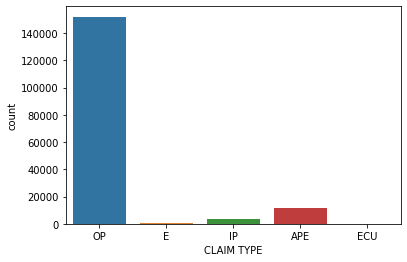

In [159]:
print(claims['CLAIM TYPE'].value_counts())
sns.countplot(x='CLAIM TYPE',data=claims)

Exploring Length of Stay

count    167064.000000
mean          0.104271
std           1.008394
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          54.000000
Name: LOS, dtype: float64


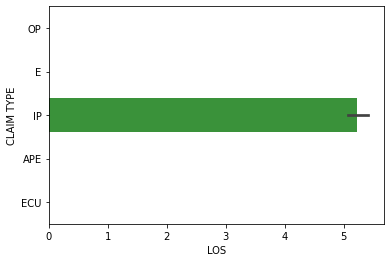

In [160]:
print(claims['LOS'].describe())
sns.barplot(x='LOS', y='CLAIM TYPE',data=claims)

In [161]:
claims.loc[claims['LOS'] == 54]

,CLAIM NO,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,SUBCLAIM TYPE,CLAIM STATUS,AVAILED,DISCHARGED,LOS,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MAIN ICD CODE,MAIN DIAGNOSIS,BILL TYPE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
52062,363491,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-10-13,2021-12-06,54,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,182668,68,F,R,LEVEL 3 - REGULAR PRIVATE,250000.0,250000.0,250000.0,0,0.0,112063


Top 10 Claims by LOS

In [172]:
claims.sort_values('LOS', ascending=False).head(10)

,CLAIM NO,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,SUBCLAIM TYPE,CLAIM STATUS,AVAILED,DISCHARGED,LOS,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MAIN ICD CODE,MAIN DIAGNOSIS,BILL TYPE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
52062,363491,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-10-13,2021-12-06,54,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,182668,68,F,R,LEVEL 3 - REGULAR PRIVATE,250000.00,250000.00,250000.00,0,0.0,112063
58439,297123,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-05-17,2021-07-09,53,METROPOLITAN MEDICAL CENTER,NATIONAL CAPITAL REGION,ANTIBIOTICS,J18.92,COMMUNITY-ACQUIRED PNEUMONIA III (THIS CLASSIF...,H,173156,71,M,R,LEVEL 4 - REGULAR PRIVATE,255000.00,283796.18,274346.18,9450,0.0,58440
31891,425286,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-10-15,2021-12-06,52,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,182668,68,F,R,LEVEL 3 - REGULAR PRIVATE,280000.00,280000.00,279400.00,600,0.0,151892
18027,241736,0,HMO RETAIL,RETAIL S,IP,SURGICAL,REQUEST FOR PAYMENT,2021-01-19,2021-03-11,51,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,B34.2,"CORONAVIRUS INFECTION, UNSPECIFIED ...",H,183490,74,M,P,LEVEL 1,629999.99,629999.99,560799.99,69200,0.0,18028
46537,281217,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-03-18,2021-05-02,45,UNIVERSITY OF PERPETUAL HELP DALTA MEDICAL CENTER,NATIONAL CAPITAL REGION,ANTIBIOTICS,A41.9,"SEPSIS, UNSPECIFIED ORGANISM ...",H,172467,60,F,A,LEVEL 4- REGULAR PRIVATE,255000.00,460950.85,352184.00,108767,0.0,46538
36842,345297,80,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-08-11,2021-09-23,43,CHONG HUA HOSPITAL MANDAUE & CANCER CENTER,CENTRAL VISAYAS,PULMONARY,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,34941,56,F,P,SMALL PRIVATE1,200000.00,200000.00,200000.00,0,0.0,96843
56673,368882,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-07-17,2021-08-28,42,ST. FRANCES CABRINI MEDICAL CENTER,CALABARZON,PULMONARY,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,169689,70,M,R,LEVEL 3-REGULAR PRIVATE,236000.00,236000.00,236000.00,0,0.0,116674
27810,334030,18,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-08-02,2021-09-11,40,METROPOLITAN MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,13483,58,M,P,PRIVATE 4 WITH POS,158000.00,158000.00,157650.00,350,0.0,87811
26449,252986,218,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-03-06,2021-04-14,39,VICTOR R. POTENCIANO MEDICAL CENTER,NATIONAL CAPITAL REGION,PULMONARY,B34.2,"CORONAVIRUS INFECTION, UNSPECIFIED ...",H,57452,50,M,P,REGULAR PRIVATE 2,150000.00,150000.00,148950.00,1050,0.0,26450
44952,279115,494,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-04-06,2021-05-15,39,NATIONAL KIDNEY & TRANSPLANT INSTITUTE,NATIONAL CAPITAL REGION,HEMO-DIALYSIS,J18.0,"BRONCHOPNEUMONIA, UNSPECIFIED ORGANISM ...",R,154599,55,M,A,LEVEL 3 - REGULAR PRIVATE,113025.28,406425.10,0.00,0,406425.1,44953


Due to frequent appearance of Company 494 in top 10 claims by LOS, we will take a deeper look into their claims

In [176]:
claims.loc[claims['COMPANY']==494].sort_values('LOS', ascending=False).head(10)

,CLAIM NO,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,SUBCLAIM TYPE,CLAIM STATUS,AVAILED,DISCHARGED,LOS,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MAIN ICD CODE,MAIN DIAGNOSIS,BILL TYPE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
52062,363491,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-10-13,2021-12-06,54,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,182668,68,F,R,LEVEL 3 - REGULAR PRIVATE,250000.00,250000.00,250000.00,0,0.0,112063
58439,297123,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-05-17,2021-07-09,53,METROPOLITAN MEDICAL CENTER,NATIONAL CAPITAL REGION,ANTIBIOTICS,J18.92,COMMUNITY-ACQUIRED PNEUMONIA III (THIS CLASSIF...,H,173156,71,M,R,LEVEL 4 - REGULAR PRIVATE,255000.00,283796.18,274346.18,9450,0.0,58440
31891,425286,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-10-15,2021-12-06,52,MAKATI MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,182668,68,F,R,LEVEL 3 - REGULAR PRIVATE,280000.00,280000.00,279400.00,600,0.0,151892
46537,281217,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-03-18,2021-05-02,45,UNIVERSITY OF PERPETUAL HELP DALTA MEDICAL CENTER,NATIONAL CAPITAL REGION,ANTIBIOTICS,A41.9,"SEPSIS, UNSPECIFIED ORGANISM ...",H,172467,60,F,A,LEVEL 4- REGULAR PRIVATE,255000.00,460950.85,352184.00,108767,0.0,46538
56673,368882,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-07-17,2021-08-28,42,ST. FRANCES CABRINI MEDICAL CENTER,CALABARZON,PULMONARY,J18.9,"PNEUMONIA, UNSPECIFIED ORGANISM ...",H,169689,70,M,R,LEVEL 3-REGULAR PRIVATE,236000.00,236000.00,236000.00,0,0.0,116674
44952,279115,494,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-04-06,2021-05-15,39,NATIONAL KIDNEY & TRANSPLANT INSTITUTE,NATIONAL CAPITAL REGION,HEMO-DIALYSIS,J18.0,"BRONCHOPNEUMONIA, UNSPECIFIED ORGANISM ...",R,154599,55,M,A,LEVEL 3 - REGULAR PRIVATE,113025.28,406425.10,0.00,0,406425.1,44953
10665,386420,494,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-12-09,2022-01-07,29,CARDINAL SANTOS MEDICAL CENTER,NATIONAL CAPITAL REGION,CENTRAL SUPPLIES,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,171723,78,M,T,LEVEL 2- REGULAR PRIVATE,222459.01,222459.01,208859.01,13600,0.0,130666
41860,275042,494,HMO CORP,CORPORATE ACCOUNTS,IP,SURGICAL,REQUEST FOR PAYMENT,2021-01-11,2021-02-09,29,"SACRED HEART HOSPITAL OF MALOLOS, INC.",CENTRAL LUZON,CENTRAL SUPPLIES,I61.9,"NONTRAUMATIC INTRACEREBRAL HEMORRHAGE, UNSPECI...",H,171340,60,F,R,LEVEL 3- REGULAR PRIVATE,255000.00,255000.00,253950.00,1050,0.0,41861
52754,364311,494,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-07-30,2021-08-26,27,"CITY OF IMUS DOCTORS HOSPITAL, INC.",CALABARZON,CENTRAL SUPPLIES,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,171029,58,F,R,LEVEL 3- REGULAR PRIVATE,424706.63,424706.63,334756.63,89950,0.0,112755
33336,341061,494,HMO CORP,CORPORATE ACCOUNTS,IP,MEDICAL,REQUEST FOR PAYMENT,2021-08-04,2021-08-30,26,WESTLAKE MEDICAL CENTER,CALABARZON,CENTRAL SUPPLIES,U07.1,"COVID-19, VIRUS IDENTIFIED ...",H,170386,76,M,T,LEVEL 3- REGULAR PRIVATE,300451.83,300451.83,300451.83,0,0.0,93337


In [184]:
claims['IP'] = np.where(((claims['CLAIM TYPE']=='IP') | (claims['CLAIM TYPE']=='E') | (claims['CLAIM TYPE']=='ECU')), 1, 0)

Checking the member with most claims

In [166]:
claims.groupby('MEMBER').agg(n_claims = ('CLAIM TYPE','count')).sort_values('n_claims',ascending=False)

,n_claims
MEMBER,
169694,237
172539,218
169409,172
171780,163
170584,161
...,...
122123,1
39330,1
122112,1


In [167]:
member = claims.loc[claims['MEMBER'] == 169694]
member.groupby('MAIN PROCEDURE').agg(
  count_claims = ('CLAIM TYPE', 'count'),
  max_LOS = ('LOS','max'),
  min_LOS = ('LOS','min'),
  avg_reimbursement = ('REIMBURSEMENT AMOUNT','sum')
)

,count_claims,max_LOS,min_LOS,avg_reimbursement
MAIN PROCEDURE,,,,
CENTRAL SUPPLIES,2,2,0,0.0
CONSULTATION,4,0,0,500.0
HEMO-DIALYSIS,154,0,0,0.0
LABORATORY-CHEMISTRY,9,0,0,0.0


Checking the provider with the most claims

In [168]:
claims.groupby('PROVIDER NAME').agg(n_provider = ('CLAIM TYPE','count')).sort_values('n_provider',ascending=False)

,n_provider
PROVIDER NAME,
PROSER HEALTH SERVICES (INACTIVE),15829
MAKATI MEDICAL CENTER,4828
THE MEDICAL CITY,4796
ST. LUKE'S MEDICAL CENTER (GLOBAL CITY) INC.,2627
"THE MEGACLINIC, INC.",2458
...,...
SAN JUAN MEDICAL CENTER,1
HEALTHMD CLINIC,1
SAN JOSE DISTRICT HOSPITAL,1


In [169]:
provider = claims.loc[claims['PROVIDER NAME'] == 'PROSER HEALTH SERVICES (INACTIVE)']
provider_agg = provider.groupby(['MAIN PROCEDURE','CLAIM TYPE']).agg(
  n_claims = ('CLAIM TYPE', 'count'),
  max_LOS = ('LOS','max'),
  min_LOS = ('LOS','min'),
  avg_covered = ('COVERED AMOUNT','sum')
).sort_values('avg_covered',ascending=False)
provider_agg.head(10)

,,n_claims,max_LOS,min_LOS,avg_covered
MAIN PROCEDURE,CLAIM TYPE,,,,
LABORATORY-CHEMISTRY,OP,2470,0,0,13868317.00
RADIOLOGY - ULTRASOUND,OP,1048,0,0,3855700.00
CONSULTATION,OP,6571,0,0,3227603.95
2D-ECHO,OP,324,0,0,1439016.80
LABORATORY-ENDOCRINE / THYROID FUNCTION,OP,187,0,0,862307.00
"APE (CBC,PE,STOOL,URI,XRAY)",OP,1227,0,0,861172.89
RADIOLOGY - XRAY,OP,588,0,0,828624.29
APE (ECG),OP,443,0,0,616143.00
APE (PAPSMEAR),OP,296,0,0,541362.00


In [170]:
provider['REIMBURSEMENT AMOUNT'].sum()

0.0

In [171]:
provider.describe()

,CLAIM NO,COMPANY,LOS,MEMBER,AGE AVAILED,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
count,15829.000000,15829.000000,15829.0,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.0,15829.0,15829.000000
mean,299661.091414,391.394719,0.0,117341.911239,44.000063,1950.689735,1950.450617,1950.450617,0.0,0.0,62293.486954
std,59433.388337,388.295143,0.0,73942.201763,13.928858,2662.111775,2660.864783,2660.864783,0.0,0.0,45422.958385
min,214009.000000,0.000000,0.0,58.000000,0.000000,50.000000,50.000000,50.000000,0.0,0.0,377.000000
25%,242550.000000,123.000000,0.0,58258.000000,33.000000,500.000000,500.000000,500.000000,0.0,0.0,18695.000000
50%,297238.000000,391.000000,0.0,100175.000000,44.000000,600.000000,600.000000,600.000000,0.0,0.0,58515.000000
75%,355831.000000,429.000000,0.0,171856.000000,55.000000,2290.000000,2290.000000,2290.000000,0.0,0.0,105627.000000
max,552157.000000,1744.000000,0.0,340471.000000,81.000000,52519.880000,52519.880000,52519.880000,0.0,0.0,166332.000000


# Skip me

In [162]:
claims.groupby('CLAIM TYPE').mean()

,CLAIM NO,COMPANY,LOS,MEMBER,AGE AVAILED,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
CLAIM TYPE,,,,,,,,,,,
APE,328557.999390,360.032483,0.000000,106267.595663,36.528346,977.430674,967.521591,962.593001,3.607071,1.321519,83316.611164
E,313779.549587,259.355372,0.000000,142370.582645,34.095041,9015.939132,9057.100413,8702.238926,32.644628,322.216860,71602.326446
ECU,365980.857143,12.857143,0.000000,155681.142857,44.000000,16021.475714,17735.761429,10664.332857,0.000000,7071.428571,113620.428571
IP,321736.331231,330.607508,5.231231,126557.071471,44.554354,66231.624805,69917.984396,54996.080324,9250.305105,5671.599949,78080.993994
OP,331275.972678,360.497730,0.000000,119270.102196,44.851370,2689.332685,2708.812643,2427.415210,189.596683,91.800782,83685.847015


In [163]:
claims.groupby('COMPANY').mean()

,CLAIM NO,LOS,MEMBER,AGE AVAILED,COVERED AMOUNT,GROSS AMOUNT,HOSPITAL BILL,PROFESSIONAL FEE,REIMBURSEMENT AMOUNT,CN#
COMPANY,,,,,,,,,,
0,331815.772676,0.199740,146503.396398,47.081616,5636.801589,5675.782043,4970.442577,505.254422,200.085001,84268.752880
2,306958.055556,0.019444,43135.183333,37.455556,2674.953528,2688.092417,2455.717417,230.916667,1.458333,65699.705556
8,291566.099099,0.153153,10489.990991,43.351351,2802.930901,2802.930901,2702.480450,91.441441,9.009009,55501.981982
9,374114.299145,0.119658,45575.658120,40.735043,3154.907906,3154.907906,2140.591667,1014.316239,0.000000,105118.564103
10,305608.545455,0.000000,297.136364,57.818182,1307.689091,1350.416364,1350.416364,0.000000,0.000000,67226.727273
...,...,...,...,...,...,...,...,...,...,...
1743,420205.000000,0.000000,330626.000000,46.000000,1218.500000,1218.500000,1218.500000,0.000000,0.000000,144805.000000
1744,409243.333333,0.000000,330429.333333,49.666667,2493.333333,2493.333333,2493.333333,0.000000,0.000000,143779.666667
1755,447950.000000,0.000000,336281.000000,50.000000,850.000000,850.000000,850.000000,0.000000,0.000000,158950.000000


In [164]:
claims_numerical = claims[['LOS','AGE AVAILED','COVERED AMOUNT','GROSS AMOUNT','HOSPITAL BILL','PROFESSIONAL FEE','REIMBURSEMENT AMOUNT']]

In [165]:
company_agg = claims.groupby('COMPANY').agg(
  avg_LOS = ('LOS','mean'),
  max_LOS = ('LOS','max'),
  min_LOS = ('LOS','min'),
  avg_reimbursement = ('REIMBURSEMENT AMOUNT','mean')
)
company_agg.head()

,avg_LOS,max_LOS,min_LOS,avg_reimbursement
COMPANY,,,,
0,0.199740,51,0,200.085001
2,0.019444,7,0,1.458333
8,0.153153,14,0,9.009009
9,0.119658,18,0,0.000000
10,0.000000,0,0,0.000000
